In [84]:
import numpy as np
import cv2
from skimage import io
from scipy import ndimage
from matplotlib import pyplot as plt

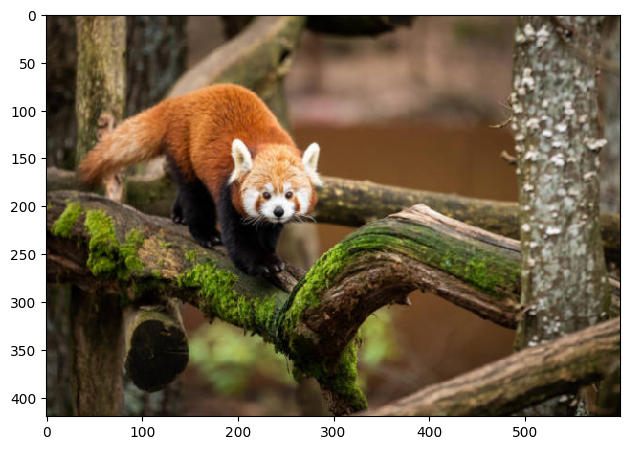

In [85]:
obraz = np.load("C:/Users/matiu/Downloads/CFA_NPY/CFA_NPY/Fuji/panda.npy")
io.imshow(obraz)

In [86]:
def kolory(maska, ksztalt):
    return np.dstack(
        [
            np.tile(maska[:, :], (ksztalt[0] // maska.shape[0], ksztalt[1] // maska.shape[1]))
        ]
    )

In [87]:
# Fuji X-Trans
maska_fuji = np.array([[0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0]], dtype=np.uint8)

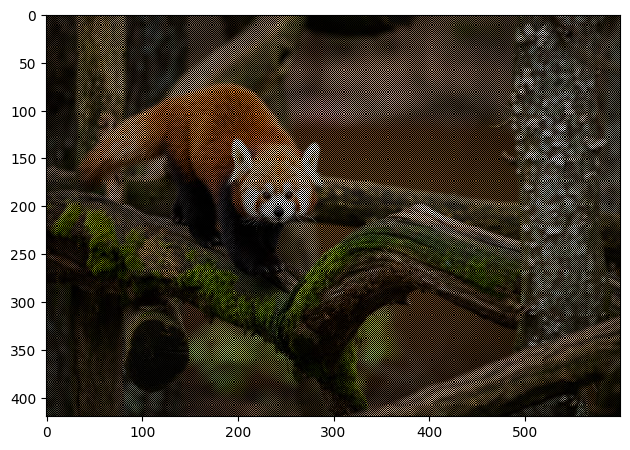

In [88]:
#ksztalt filtru
filtr_fuji = kolory(maska_fuji, ksztalt=obraz.shape)
obraz_sensora = obraz * filtr_fuji
_ = io.imshow(obraz_sensora)

In [89]:
maska_demozaikowania_fuji = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])

In [90]:
zrekonstruowany_fuji = np.dstack([
    ndimage.convolve(obraz_sensora[:, :, kanal], maska_demozaikowania_fuji[:, :, kanal], mode="constant", cval=0.0)
    for kanal in range(3)
])

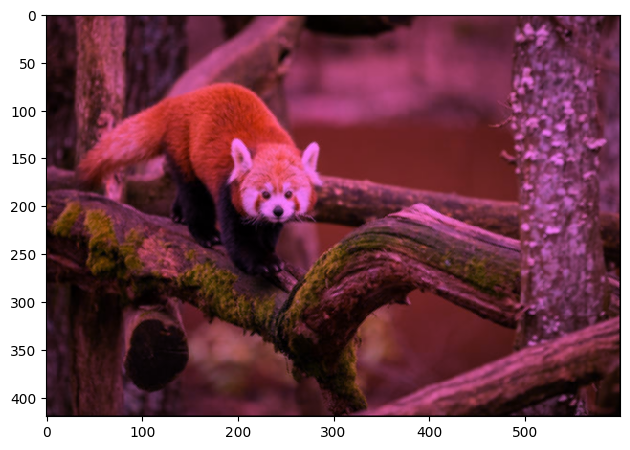

In [91]:
zrekonstruowany_fuji = (zrekonstruowany_fuji - np.min(zrekonstruowany_fuji)) / (np.max(zrekonstruowany_fuji) - np.min(zrekonstruowany_fuji))

io.imshow(zrekonstruowany_fuji)
io.show()

In [ ]:
obraz = np.load("C:/Users/matiu/Downloads/CFA_NPY/CFA_NPY/Fuji/panda.npy")
io.imshow(obraz)
maska_fuji = np.array([[1, 13, 5, 12], [9, 0, 8, 4], [3, 14, 2, 15], [11, 6, 10, 7]])

def demozaikuj(obraz, maska):
    wynik = np.zeros_like(obraz)
    for i in range(3):
        kanal = obraz[:, :, i]
        mozaika = kanal[::2, ::2] * maska
        wynik[::2, ::2, i] = cv2.resize(mozaika, (obraz.shape[1], obraz.shape[0]), interpolation=cv2.INTER_NEAREST)
    return wynik
wynik_fuji = demozaikuj(obraz, maska_fuji)
io.imshow(wynik_fuji)